In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# we have create 40 separateble points
X, y = make_blobs(n_samples=40, centers=2, random_state=20)
# fit the model dont regulariz the illuminaraton purposes
clf=svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

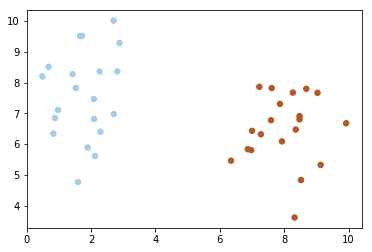

In [3]:
#disply the data groph
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [4]:
#using predict unkown data
newData = [[3,4],[5,6]]
print(clf.predict(newData))

[0 1]


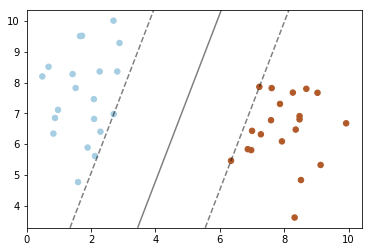

In [5]:
clf=svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
#disply the data groph
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#plot decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY,XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
z = clf.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margin
ax.contour(XX, YY, z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#plot support vectors
ax.scatter(clf.support_vectors_[:, 0],
          clf.support_vectors_[:, 1], s=100,
          linewidth=1,facecolors='none')
plt.show()

# data set use

In [6]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [7]:
# Read the data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


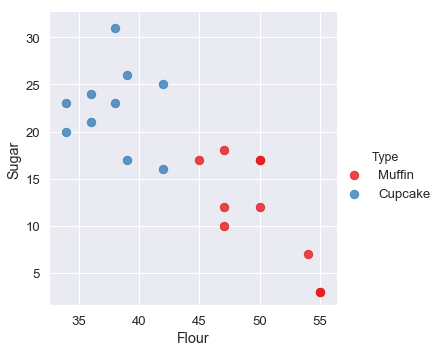

In [8]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [9]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

C:\Anakonda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [10]:
# fit model
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
#visulation
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

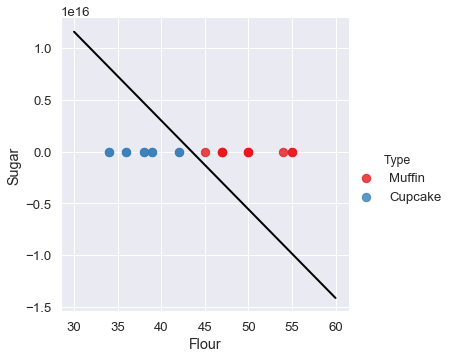

In [12]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

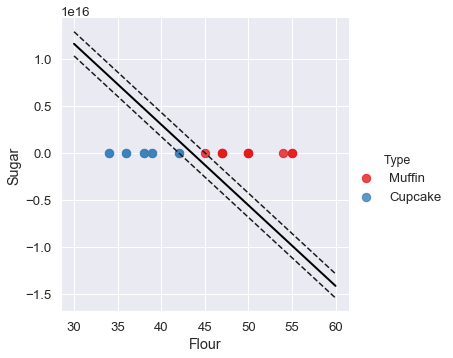

In [13]:
#Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [14]:
# predict new case
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [15]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


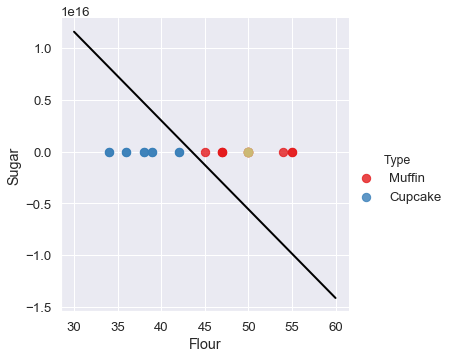

In [16]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [17]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [18]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [19]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [20]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [21]:
# S = String
pickle.dumps(muffin_cupcake_dict)

b'\x80\x03}q\x00(X\x14\x00\x00\x00muffin_cupcake_modelq\x01csklearn.svm.classes\nSVC\nq\x02)\x81q\x03}q\x04(X\x17\x00\x00\x00decision_function_shapeq\x05X\x03\x00\x00\x00ovrq\x06X\x06\x00\x00\x00kernelq\x07X\x06\x00\x00\x00linearq\x08X\x06\x00\x00\x00degreeq\tK\x03X\x05\x00\x00\x00gammaq\nX\x0f\x00\x00\x00auto_deprecatedq\x0bX\x05\x00\x00\x00coef0q\x0cG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\rG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x0eG?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\x0fG\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x10G\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x11\x88X\x0b\x00\x00\x00probabilityq\x12\x89X\n\x00\x00\x00cache_sizeq\x13K\xc8X\x0c\x00\x00\x00class_weightq\x14NX\x07\x00\x00\x00verboseq\x15\x89X\x08\x00\x00\x00max_iterq\x16J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x17NX\x07\x00\x00\x00_sparseq\x18\x89X\r\x00\x00\x00class_weight_q\x19cnumpy.core.multiarray\n_reconstruct\nq\x1acnumpy\nndarray\nq\x1bK\x00\x85q\